# Fast dmdt method
### Ashish Mahabal <aam at astro.caltech.edu>
### 2018-11-12

### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

### Read data
#### 'KeplerSampleFullQ.npy' has 2500 light curves. Each is a array with columns: time, mag, magerr
#### We will use the 251st light curve as out example

In [2]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


#### plot the light curve

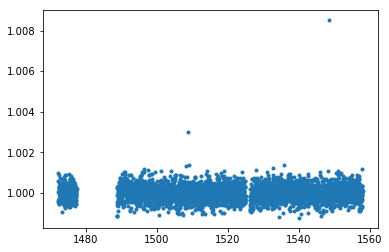

In [3]:
plt.plot(kdata[250][0],kdata[250][1],'.')

In [96]:
# Usage: xd = pairwisediffs(kdata[250][0]); yd = pairwisediffs(kdata[250][1])
def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)

In [107]:
xd = pairwisediffs(kdata[250][0])
yd = pairwisediffs(kdata[250][1])

### get the dmints and dtints

In [134]:
dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.0009, -0.0007, 
          -0.0006, -0.0005, -0.0004, -0.0003, -0.0002, -0.00015, -0.0001, 
          -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02]
dtints = [-1.0/145, 20.0/145, 30.0/145, 45.0/145, 60.0/145, 80.0/145, 90.0/145, 
          100.0/145, 120.0/145,  140.0/145, 1.0,  1.1, 1.2,  
          1.3,  1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 6 , 9, 15, 20, 30, 45, 60, 90]

### Plot the 2D histogram with native bins (as defined above)
### H[0] contains the densities, H[1] and H[2] contain the binedges, H[3] is meshgrid
### The x- and y-bins as shown are unequal sized

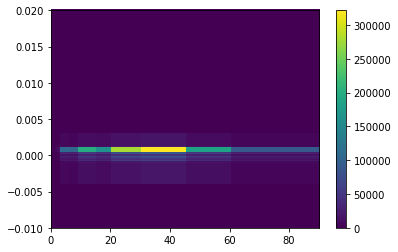

In [135]:
H = plt.hist2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
plt.colorbar(H[3])

### Using equal sized bins (default to hist) shows how the x (dt) distribution is

(array([ 494322.,  448183.,  421353.,  401424.,  396411.,  392651.,
         372262.,  348814.,  328087.,  306363.,  288164.,  271315.,
         257014.,  235546.,  213473.,  189736.,  161395.,  144455.,
         125884.,  104740.,   83795.,   61761.,   41305.,   37168.,
          36984.,   37047.,   32079.,   11080.]),
 array([  2.04330702e-02,   3.08549384e+00,   6.15055460e+00,
          9.21561537e+00,   1.22806761e+01,   1.53457369e+01,
          1.84107977e+01,   2.14758584e+01,   2.45409192e+01,
          2.76059800e+01,   3.06710407e+01,   3.37361015e+01,
          3.68011623e+01,   3.98662230e+01,   4.29312838e+01,
          4.59963446e+01,   4.90614053e+01,   5.21264661e+01,
          5.51915269e+01,   5.82565876e+01,   6.13216484e+01,
          6.43867092e+01,   6.74517699e+01,   7.05168307e+01,
          7.35818915e+01,   7.66469522e+01,   7.97120130e+01,
          8.27770738e+01,   8.58421345e+01]),
 <a list of 28 Patch objects>)

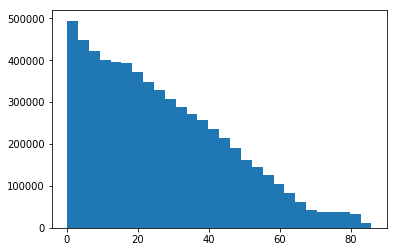

In [136]:
plt.hist(xd,bins=28)

### and this is how it is with the bins we have defined
### Clearly, the first few have very few points in them
### Note that the bins have different sizes

(array([   20826.,    13820.,    17221.,    17142.,    23848.,    10224.,
           10166.,    23611.,    23470.,     3340.,    16657.,    16585.,
           16531.,    16478.,    16428.,    32706.,    45455.,    41866.,
           38357.,    75874.,   440693.,   414197.,   782903.,   631291.,
         1096018.,  1263318.,   750052.,   383734.]),
 array([ -6.89655172e-03,   1.37931034e-01,   2.06896552e-01,
          3.10344828e-01,   4.13793103e-01,   5.51724138e-01,
          6.20689655e-01,   6.89655172e-01,   8.27586207e-01,
          9.65517241e-01,   1.00000000e+00,   1.10000000e+00,
          1.20000000e+00,   1.30000000e+00,   1.40000000e+00,
          1.50000000e+00,   1.70000000e+00,   2.00000000e+00,
          2.25000000e+00,   2.50000000e+00,   3.00000000e+00,
          6.00000000e+00,   9.00000000e+00,   1.50000000e+01,
          2.00000000e+01,   3.00000000e+01,   4.50000000e+01,
          6.00000000e+01,   9.00000000e+01]),
 <a list of 28 Patch objects>)

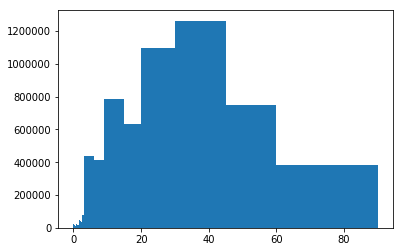

In [137]:
plt.hist(xd,bins=dtints)

### Using equal sized bins shows how the y (dm) distribution is

(array([  4.46000000e+02,   2.00000000e+00,   9.70000000e+01,
          6.87700000e+03,   3.92679100e+06,   2.30395900e+06,
          1.54800000e+03,   7.00000000e+00,   1.30000000e+02,
          2.95400000e+03]),
 array([-0.00938731, -0.00747487, -0.00556242, -0.00364998, -0.00173753,
         0.00017491,  0.00208735,  0.0039998 ,  0.00591224,  0.00782469,
         0.00973713]),
 <a list of 10 Patch objects>)

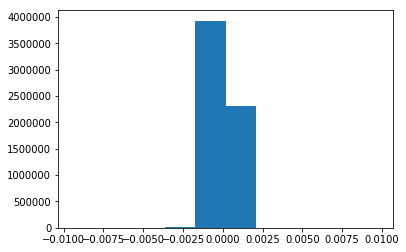

In [138]:
plt.hist(yd)

### ... and this is how it is with the bins we have defined
### Clearly, several on either side have very few points in them
### Here the bins are more symmetric (though still unequal sized)

(array([  4.48000000e+02,   0.00000000e+00,   7.00000000e+00,
          9.28240000e+04,   1.24031000e+05,   1.01668000e+05,
          3.15594000e+05,   2.25853000e+05,   2.76127000e+05,
          3.26794000e+05,   3.75093000e+05,   4.13287000e+05,
          2.17763000e+05,   2.24148000e+05,   2.26958000e+05,
          2.28241000e+05,   2.28895000e+05,   2.25341000e+05,
          4.37954000e+05,   4.09564000e+05,   1.58291900e+06,
          1.19102000e+05,   8.65350000e+04,   5.74000000e+02,
          6.00000000e+00,   1.00000000e+00,   3.08400000e+03,
          0.00000000e+00]),
 array([ -1.00000000e-02,  -6.00000000e-03,  -5.00000000e-03,
         -4.00000000e-03,  -1.20000000e-03,  -1.00000000e-03,
         -9.00000000e-04,  -7.00000000e-04,  -6.00000000e-04,
         -5.00000000e-04,  -4.00000000e-04,  -3.00000000e-04,
         -2.00000000e-04,  -1.50000000e-04,  -1.00000000e-04,
         -5.00000000e-05,   0.00000000e+00,   5.00000000e-05,
          1.00000000e-04,   2.00000000e-04

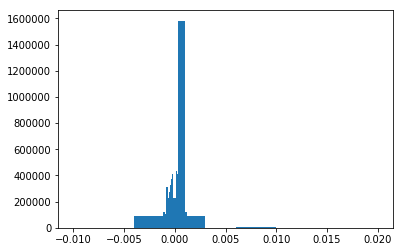

In [139]:
plt.hist(yd,bins=dmints)

#### Plot the 2d histogram using equalsized pixels

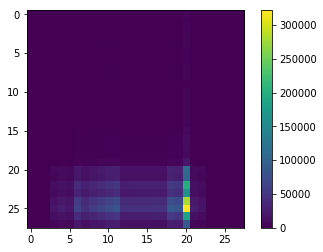

In [140]:
plt.imshow(H[0])
plt.colorbar()

#### Normalize H by sum

255.0


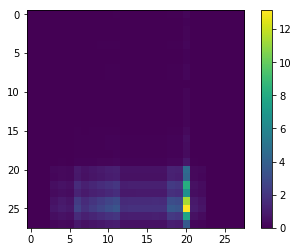

In [141]:
G = 255*H[0]/np.sum(H[0])
plt.imshow(G)
plt.colorbar()
print(np.sum(G))

In [181]:
# USAGE: fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

#### Store G along with dmints and dtints used to calculate it
#### Ideal to do this for all light curves, and store dtints and dmints only once

In [182]:
fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])

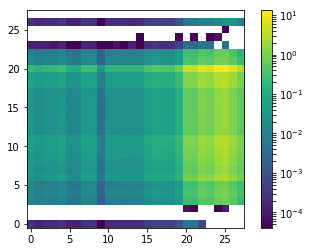

In [183]:
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

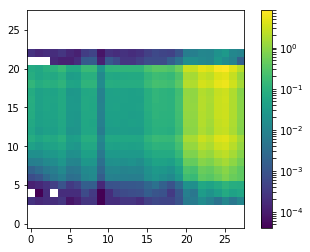

In [184]:
fastdmdt = get2dhist([kdata[25][0],kdata[25][1]])
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

In [185]:
def plotme(n):
    fastdmdt = get2dhist([kdata[n][0],kdata[n][1]])
    plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
    plt.colorbar()

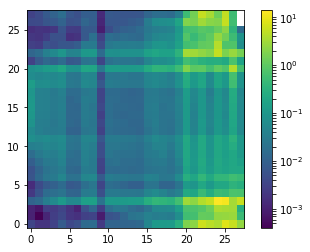

In [186]:
plotme(0)

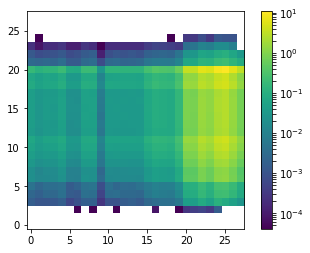

In [187]:
plotme(1)

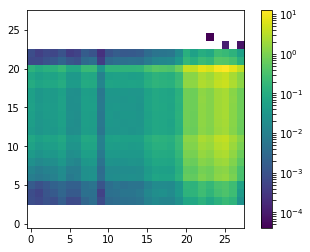

In [188]:
plotme(2)